# k Nearest Neighbor Assignment

### Q0.
1. What is the difference between regression and classification?

Regression is the prediction of a numeric outcome, whereas classification is the prediction of a categorical outcome. 

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table is a table that shows the cross-tablation of the predicted vs true values. It helps us measure the performance of a classifier by looking for patterns in the successes and failures. 

3. What does the SSE quantify about a particular model?

The SSE quantifies how far the predicted values are from the true values. We calculate this by finding the squared norm of the distance between y and y hat.

4. What are overfitting and underfitting?

Overfitting occurs when the model is too complex to reliably explain the phenomenon you are interested in. This can happen if k is very small. Underfitting occurs when the model is too simple to reliably explain the phenomenon you are interested in. This can happen if k is very large. 

5. Why does splitting the data into training and testing sets, and choosing by evaluating accuracy or SSE on the test set, improve model performance?

Splitting the sample means that we are using some of the data to train the model and the rest of the data to test the model to see if it's accurate. If you use only the test data to pick the hyperparameters, like the k value, you could be overfitting your model. Evaluating accuracy or SSE on the test set helps measure generalization.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting class labels as a prediction is good if you have imputations, because kMM is "chunky" and won't have significant global smoothing patterns that could interfere with another algorithm's learning. Because of this global smoothing, it makes it difficult t interpret the impact of individual variables on predictions. 
Reporting as a probability distribution over class labels can be good because it has "smooth" local smoothing, like with kernel density plots. One of its weaknesses are that it requires more computer computation.

### Q6

1. Load the airbnb_hw.csv data with Pandas. We're only going to use Review Scores Rating, Price, and Beds, so use .loc to reduce the dataframe to those variables.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
import seaborn as sns

In [2]:
# loading airbnb_hw.csv data 
df = pd.read_csv('./hw data/airbnb_hw.csv')

# using .loc to reduce to only 3 variables
df = df.loc[:, ['Review Scores Rating', 'Price', 'Beds']]

# print first 10 rows
df.head(10)

,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0
5,100.0,149,1.0
6,100.0,250,1.0
7,94.0,90,1.0
8,90.0,270,2.0
9,96.0,290,2.0


2. Set use .isnull() to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.

In [3]:
# pull the rows that are null for 'Review Scores Rating' and create a separate dataframe
df_missing = df[df['Review Scores Rating'].isnull()]

# only keep rows where 'Review Scores Rating' is not null
df = df[df['Review Scores Rating'].notnull()]

# print first rows of df_missing 
print("df_missing:" , df_missing.head(10))
print("df: " , df.head(10))

df_missing:     Review Scores Rating Price  Beds
0                    NaN   145   1.0
1                    NaN    37   1.0
2                    NaN    28   1.0
3                    NaN   199   3.0
13                   NaN    68   1.0
19                   NaN   700   3.0
21                   NaN   175   1.0
22                   NaN    90   1.0
29                   NaN    99   4.0
30                   NaN    99   1.0
df:      Review Scores Rating Price  Beds
4                   96.0   549   3.0
5                  100.0   149   1.0
6                  100.0   250   1.0
7                   94.0    90   1.0
8                   90.0   270   2.0
9                   96.0   290   2.0
10                  98.0   170   2.0
11                  93.0    59   2.0
12                  91.0    49   2.0
14                  97.0   285   1.0


3. Use df = df.dropna(axis = 0, how = 'any') to eliminate any observations with missing values/NA's from the dataframe.

In [4]:
# eliminate any rows with missing values
df = df.dropna(axis=0, how='any')

4. For the complete cases, create a k-NN model that uses the variables Price and Beds to predict Review Scores Rating. How do you choose ? (Hint: Train/test split, iterate over reasonable values of and find a value that minimizes SSE on the test split using predictions from the training set.)

I chose k = 48 as the best model because that is the value for k which minimizes the SSE on the test set. 

In [5]:
# make sure that all variables are only floats
df['Price'] = df['Price'].replace(',', '', regex=True).astype(float)
df['Beds'] = df['Beds'].replace(',', '', regex=True).astype(float)
df['Review Scores Rating'] = df['Review Scores Rating'].replace(',', '', regex=True).astype(float)

In [6]:
# target variable vector
y = df['Review Scores Rating'] 
# predictor matrix
X = df.loc[:, ['Price', 'Beds']]

# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=65)

In [7]:
# number of k's to try
k_bar = 50 
# to store the SSE 
SSE = []  
# save the training error
SSE_on_train = [] 


for k in range(k_bar):
    # create a sk model for k
    model = KNeighborsRegressor(n_neighbors=k+1) 
    # train the model training data
    fitted_model = model.fit(X_train,y_train) 
    # predict values for test set
    y_hat = fitted_model.predict(X_test) 
    # save the computed SSE for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) 
    # predict values for training set
    y_hat = fitted_model.predict(X_train) 
    # save the computed SSE
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) )

# find lowest SSE
SSE_min = np.min(SSE) 
# find the indices of SSE that equal the min
min_index = np.where(SSE==SSE_min) 
# find optimal value of k
k_star = min_index[0]+1 
# print k star
print(k_star)

[48]


5. Predict the missing ratings.

In [8]:
# train k-NN on the training dataset
k = 48
knn_model = KNeighborsRegressor(n_neighbors=k)
# use training data with known ratings
knn_model.fit(X_train, y_train) 

# make sure that all variables are only floats
df_missing['Price'] = df_missing['Price'].replace(',', '', regex=True).astype(float)
df_missing['Beds'] = df_missing['Beds'].replace(',', '', regex=True).astype(float)

# take only Price & Beds (relevant columns) for prediction
X_missing = df_missing[['Price', 'Beds']].copy()

# handle missing values in Price or Beds columns
X_missing['Price'] = X_missing['Price'].fillna(X_train['Price'].median())
X_missing['Beds'] = X_missing['Beds'].fillna(X_train['Beds'].median())


# predict missing ratings using knn model
predicted_ratings = knn_model.predict(X_missing)

# fill in missing values with predictions
df_missing['Review Scores Rating'] = predicted_ratings

# print predicted missing ratings 
print(df_missing)

       Review Scores Rating  Price  Beds
0                 93.583333  145.0   1.0
1                 88.479167   37.0   1.0
2                 85.062500   28.0   1.0
3                 89.437500  199.0   3.0
13                89.833333   68.0   1.0
...                     ...    ...   ...
30473             90.041667  300.0   5.0
30474             92.104167  125.0   2.0
30475             91.562500   80.0   1.0
30476             87.083333   35.0   1.0
30477             91.562500   80.0   1.0

[8323 rows x 3 columns]


6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

They do not look similar. First, they have very different ranges for the x values. The KDE of Training Ratings graph has a domain of approximately 0-100, whereas the KDE of Predicted Missing Ratings has a domain of 82-98. The range of y-values is also different between the two graphs - with training ratings having y values between approximately 0-0.08 and the predicted missing ratings having y values between approximately 0-0.3. While both graphs do have a peak near the right end, they are at different x-values. Additionally, while they both also have two smaller peaks, those peaks are at different x values and also at different distances from each other per graph. 

[Text(0.5, 1.0, 'KDE of Training Ratings')]

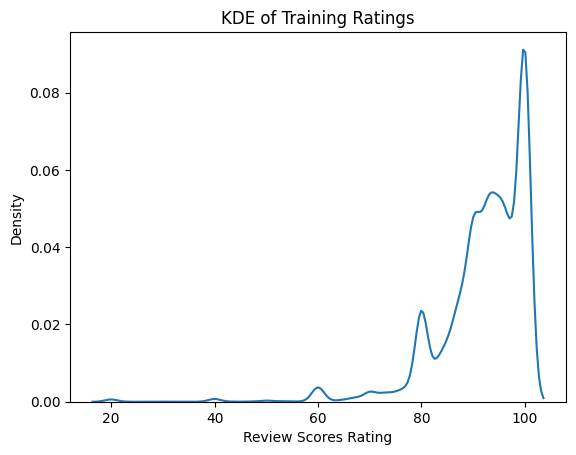

In [9]:
# kernel density plot for training ratings
sns.kdeplot(data=df, x='Review Scores Rating').set(title='KDE of Training Ratings')

[Text(0.5, 1.0, 'KDE of Predicted Missing Ratings')]

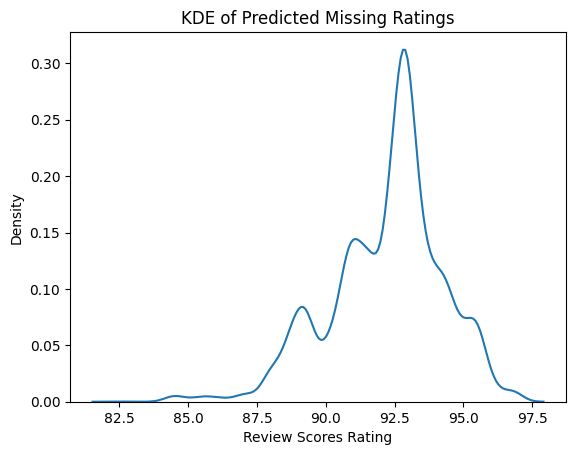

In [10]:
# kernel density plot for predicted missing ratings
sns.kdeplot(data=df_missing, x='Review Scores Rating').set(title='KDE of Predicted Missing Ratings')